## INFO7390 37570 Advances Data Sci/Architecture

## Assignment 1 : K- Means Clustering


#### Name: Ashish Kumar
#### NUID: 0014499787

In [1]:
#Import all the required Libraries

import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

The dataset which we are going to use is ‘ipl.csv’ which has two features of bowlers. Feature one is bowling score and feature two is bowling average (Normalized 0-1). We will use pandas to read the CSV file and describe the dataset.

In [2]:
df=pd.read_csv('ipl.csv')
df.describe()

,one,two
count,87.000000,87.000000
mean,0.481660,0.493573
std,0.281038,0.271722
min,0.001752,0.000516
25%,0.216059,0.230264
50%,0.550424,0.527104
75%,0.691850,0.682338
max,0.979188,0.991122


In [3]:
df.head()

,one,two
0,0.227680,0.858204
1,0.979188,0.077151
2,0.504577,0.553114
3,0.058132,0.528098
4,0.775343,0.217922


In [4]:
X = df.iloc[:, [0, 1]].values


Next step is to choose the number of iterations which might guarantee convergence. We need to try many possibilities to find optimum number of iterations required for convergence. There is no need to choose a very large number because say at 150th iteration, if the centroids arrived to their true location or best possible location, even after performing 1000 extra iterations, the algorithm will give same results. So for convenience let’s start by choosing number of iterations as 150.

In [5]:
m=X.shape[0] 
n=X.shape[1] 
iterations=150 #number of iterations

We randomly pick K cluster centers(centroids). Let’s assume value of K=3.  We can use "Elbow method" to detrmine the value of K as well

In [6]:
K=3 # number of clusters

We are ready to implement our Kmeans Clustering steps. Initialize the centroids randomly from the data points: Centroids is a n x K dimentional matrix, where each column will be a centroid for one cluster. For each training example compute the euclidian distance from the centroid and assign the cluster based on the minimal distance. The output of our algorithm should be a dictionary with cluster number as Keys and the data points which belong to that cluster as values. So let’s initialize the dictionary.

In [7]:
Centroids=np.array([]).reshape(n,0) 

for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]

cluster={}

We find the euclidian distance from each data point to all the centroids and store in a m X K matrix. So every row in EuclidianDistance matrix will have distances of that particular data point from all the centroids. Next, we shall find the minimum distance and store the index of the column in a vector dist.

In [8]:
EuclidianDistance=np.array([]).reshape(m,0)
for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
dist=np.argmin(EuclidianDistance,axis=1)+1

We need to regroup the data points based on the cluster index dist and store in the cluster dictionary and also compute the mean of separated clusters and assign it as new centroids. temp_dict is a temporary dictionary which stores the solution for one particular iteration.

In [9]:
temp_dict={}
for k in range(K):
    temp_dict[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    temp_dict[dist[i]]=np.c_[temp_dict[dist[i]],X[i]]
     
for k in range(K):
    temp_dict[k+1]=temp_dict[k+1].T
    
for k in range(K):
     Centroids[:,k]=np.mean(temp_dict[k+1],axis=0)

Now we need to repeat this step till convergence is achieved. We will run for iterations=150

In [10]:
for i in range(iterations):
    
    EuclidianDistance=np.array([]).reshape(m,0)
    
    for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
        
    tempDist=np.argmin(EuclidianDistance,axis=1)+1
    temp_dict={}
    
    for k in range(K):
        temp_dict[k+1]=np.array([]).reshape(2,0)
        
    for i in range(m):
        temp_dict[tempDist[i]]=np.c_[temp_dict[tempDist[i]],X[i]]
     
    for k in range(K):
        temp_dict[k+1]=temp_dict[k+1].T
    
    for k in range(K):
        Centroids[:,k]=np.mean(temp_dict[k+1],axis=0)
    Output=temp_dict

Now it’s time to visualize the algorithm and notice how the original data is clustered. To start with, let’s scatter the original unclustered data first.

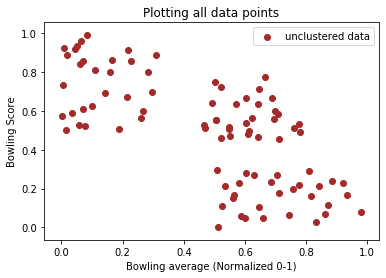

In [11]:
plt.scatter(X[:,0],X[:,1],c='brown',label='unclustered data')
plt.xlabel('Bowling average (Normalized 0-1)')
plt.ylabel('Bowling Score')
plt.legend()
plt.title('Plotting all data points')
plt.show()

Now let’s plot the clustered data:

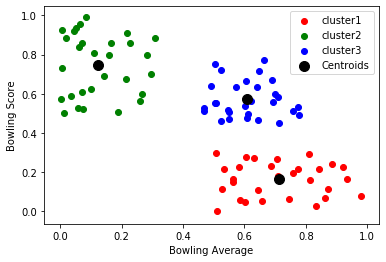

In [12]:
color=['red','green','blue',]
labels=['cluster1','cluster2','cluster3']

for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=100,c='black',label='Centroids')

plt.xlabel('Bowling Average')
plt.ylabel('Bowling Score')
plt.legend()
plt.show()

Now, we can easily see the algorithm has divided the unclustered data into three clusters.

Cluster 1 (Red)- Low Bowling average and High bowling score

Cluster 2 (Green)- Medium to High Bowling Average and Medium Bowling Score

Cluster 3 (Blue) - High Bowling average and Low Bowling score